<a href="https://colab.research.google.com/github/Claudia-Salas/python/blob/main/2023_11_07_generadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generadores
===========

**Date:** 2023-11-07



## Ejemplo



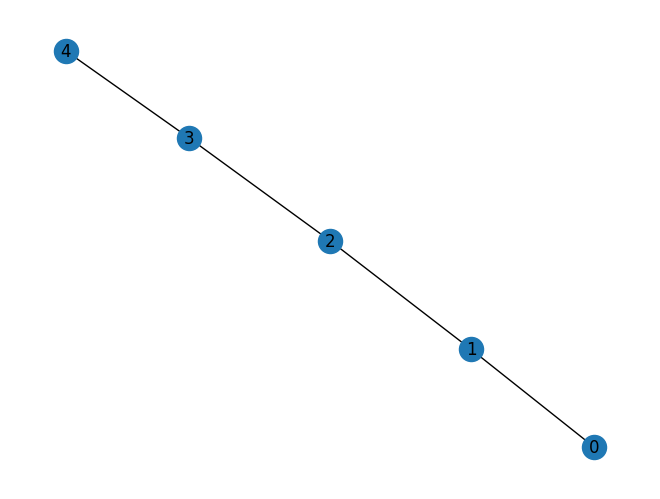

In [1]:
import networkx as nx
g = nx.path_graph(5)
nx.draw(g, with_labels=True)

In [20]:
clanes = nx.find_cliques(g)
clanes

<generator object find_cliques at 0x7a0cae68e500>

In [21]:
next(clanes)

[1, 0]

Cuando un generador se termina, ejecutar `next` produce la excepción `StopIteration`. Podemos entonces enlistar los clanes de la siguiente manera:



In [22]:
clanes = nx.find_cliques(g)

while True:
    try:
        clan = next(clanes)
        print(clan)
    except StopIteration:
        break

[1, 0]
[1, 2]
[3, 2]
[3, 4]


## Problema



Supongamos que queremos determinar si una gráfica muy grande tiene al menos un clan de tamaño al menos 10. (Con 1000 vértices se puede esperar un dibujo, con 10000 vértices ya toma demasiado tiempo)



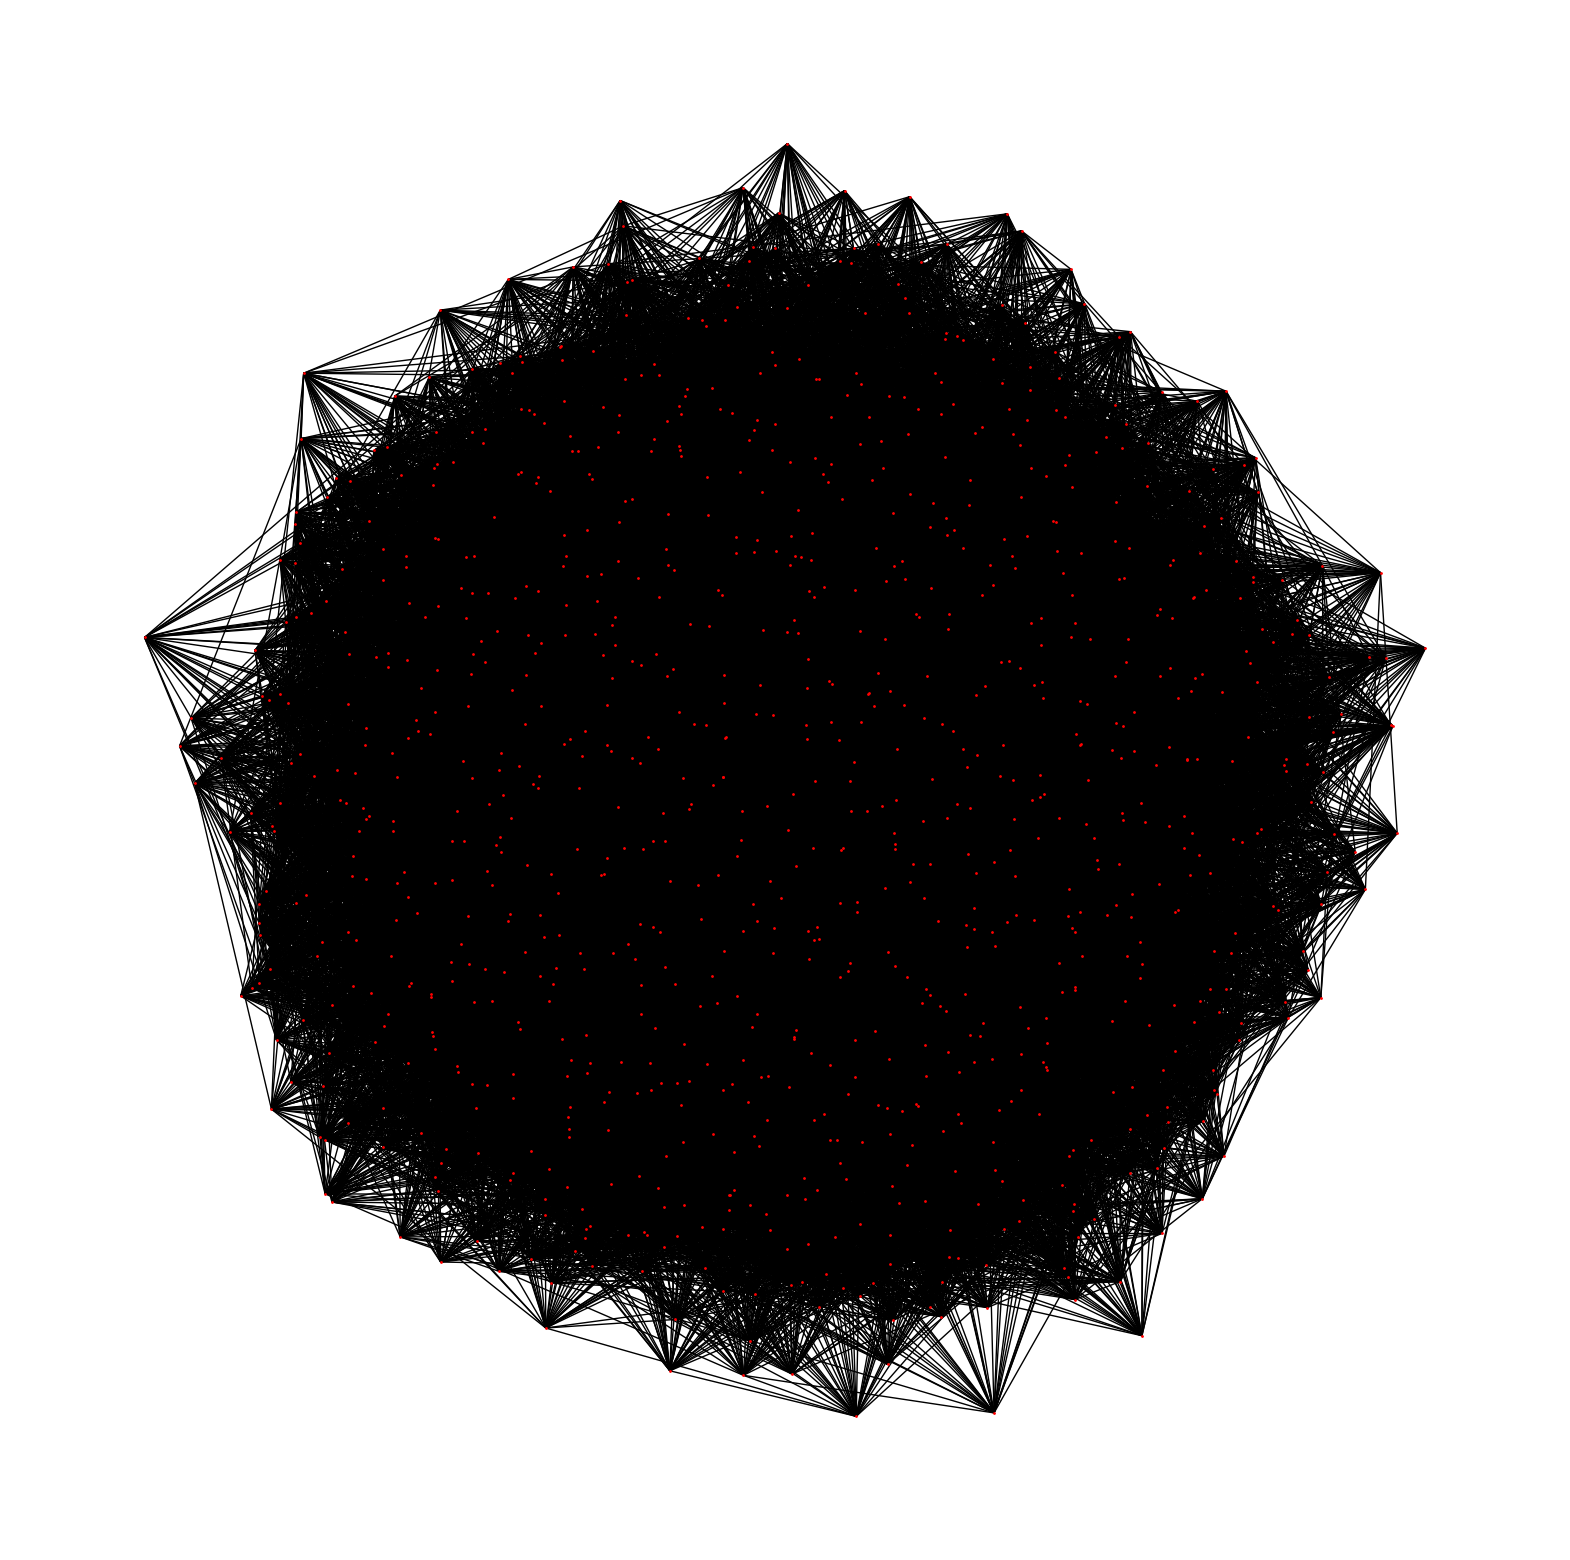

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

g = nx.gnp_random_graph(1000, 0.05)
nx.draw(g, node_size=1, node_color='red')

In [56]:
clanes = nx.find_cliques(g)
clanes

<generator object find_cliques at 0x7a0cac41ab20>

In [57]:
next(clanes)

[0, 897, 214, 846]

In [58]:
len(list(clanes))

20976

In [59]:
clanes = nx.find_cliques(g)

b = 5

for q in clanes:
    if len(q) >= b:
        print(f"El clan {q} tiene al menos {b} vértices")

El clan [102, 616, 228, 212, 870] tiene al menos 5 vértices


In [60]:
b = 7

clanes = nx.find_cliques(g)

for q in clanes:
    if len(q) >= b:
        print(f"El clan {q} tiene al menos {b} vértices")
        break # Si encuentra el clan, 'break' interrumpe el ciclo 'for'
else: # una cláusula 'else' en un ciclo 'for' se ejecuta si el ciclo se agotó
    print("No encontré tal clan.")

No encontré tal clan.


## Definir generadores



Un generador se puede definir usando la misma sintaxis que para una función, pero usando la palabra `yield` en lugar de `return`. Cada llamada a `next` ejecuta la función hasta encontrar el siguiente `yield`.



In [71]:
def saludos():
    yield "Hola"
    yield "Qué tal"
    yield "Buenos días"

salu = saludos()
salu

<generator object saludos at 0x7a0c9a951e70>

In [72]:
next(salu)

'Hola'

los generadores hacen que corra el primer yield y si se vuelve a correr tomará el siuignete hasta terminar los yield

In [73]:
def pares(m, n):
    for i in range(m):
        for j in range(n):
            yield (i, j)

gener = pares(3, 4)
gener

<generator object pares at 0x7a0c9a951e00>

In [84]:
next(gener)

(2, 1)

In [85]:
gener2 = pares(3, 3)
list(gener2)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [86]:
def cuadrados():
    i = 0
    while True:
        i = i+1
        yield i**2

cuads = cuadrados()
cuads

<generator object cuadrados at 0x7a0c9a951f50>

In [93]:
next(cuads)

49

obtenenos todos los cuadrados

In [94]:
def fibo_gen():
    i, j = 0, 1
    while True:
        yield i
        i, j = i+j, i

fibos = fibo_gen()
fibos

<generator object fibo_gen at 0x7a0c9a951ee0>

genera los numeros de fibonacci

In [100]:
next(fibos)

5

También se puede obtener un generador por medio de una sintaxis parecida a la de las comprensiones de listas.



In [101]:
import networkx as nx

grafica = (nx.graph_atlas(i) for i in range(1253))
grafica

<generator object <genexpr> at 0x7a0c9a952030>

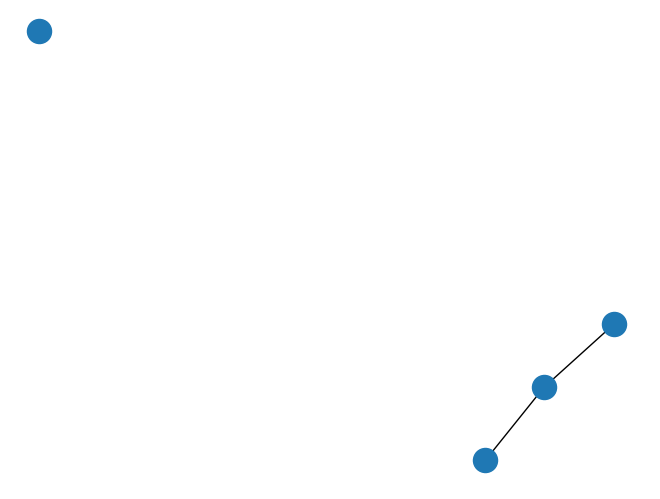

In [112]:
nx.draw(next(grafica))

## Leer archivos



Un archivo de texto se lee en Python por medio de un generador de sus líneas.



In [113]:
mis_datos = open("datos.csv")

FileNotFoundError: ignored

In [114]:
next(mis_datos)

NameError: ignored

## Tarea



Hacer una función que, dada una lista de cadenas, informe cuántas veces ocurre cada cadena. Por ejemplo, si la lista es `['la', 'casa', 'roja', 'es', 'roja']`, debe reportar que 'la', 'casa' y 'es' aparecen una vez cada una y 'roja' aparece dos veces.

Guardar la letra de una canción en un archivo de texto. Hacer una función que reciba el nombre del archivo y reporte cuántas veces ocurre cada palabra.

**Sugerencias** Para la primer tarea, escoger una estructura de datos que sea adecuada para el problema. Para la segunda, usar el método `strip` de una cadena, la cual remueve el carácter de salto de línea del final de una línea.

